In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from alphapackage.operators import *
from alphapackage.data_utils import DataHolder
from alphapackage.alphas import BaseAlpha

import warnings
warnings.filterwarnings("ignore")

In [12]:
dh = DataHolder(path="../csv_data", filter_outliers=False)
rtrns = {}
stats = {}

In [13]:
def run_alpha(Alpha : BaseAlpha):
    global rtrns, stats

    test_alpha = Alpha()
    test_alpha.get_weights(dh)
    test_alpha.run_weights(dh)
    test_alpha.print_average_stats()
    test_alpha.print_yearly_stats()
    test_alpha.plot_cumpnl()

    rtrns[Alpha.__name__] = test_alpha.pnl
    stats[Alpha.__name__] = test_alpha.get_average_stats()


def compare_alphas(rtrns, figsize=(10, 6), cmap='Blues', title='Корреляция альф'):
    df = pd.DataFrame(rtrns)
    correlation_matrix = df.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(
        correlation_matrix,
        cmap=cmap,
        annot=True,
        fmt='.2f'
    )
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

***
$$ \alpha_{1} = \frac{open}{close} $$

In [14]:
class Alpha1(BaseAlpha):
    def get_weights(self, dh : DataHolder):
        raw = dh.data['open'].div(dh.data['close'])
        self.w = decay(raw, 5)
        self.w = neutralize(self.w)
        self.w = normalize(self.w)

****************************************
average_turnover = 0.7274595659826604
average_Sharpe = 2.7701214285303823
sum_pnl = 1.7626577006603799
****************************************
Максимальная просадка за 2016 год: 0.0547295554356767
Коэффициент Шарпа за 2016 год: 3.5821533309320293
Средний оборот за 2016 год: 0.7147011272832464
Суммарная доходность за 2016 год: 0.34154448218056116
------------------------------
Максимальная просадка за 2017 год: 0.02784390896476069
Коэффициент Шарпа за 2017 год: 3.415541393164745
Средний оборот за 2017 год: 0.7242008381402543
Суммарная доходность за 2017 год: 0.2461426947427809
------------------------------
Максимальная просадка за 2018 год: 0.031743040126241406
Коэффициент Шарпа за 2018 год: 4.259838416305771
Средний оборот за 2018 год: 0.728709220989818
Суммарная доходность за 2018 год: 0.38275220605776383
------------------------------
Максимальная просадка за 2019 год: 0.1013255882289803
Коэффициент Шарпа за 2019 год: 1.9723931869311742
Сред

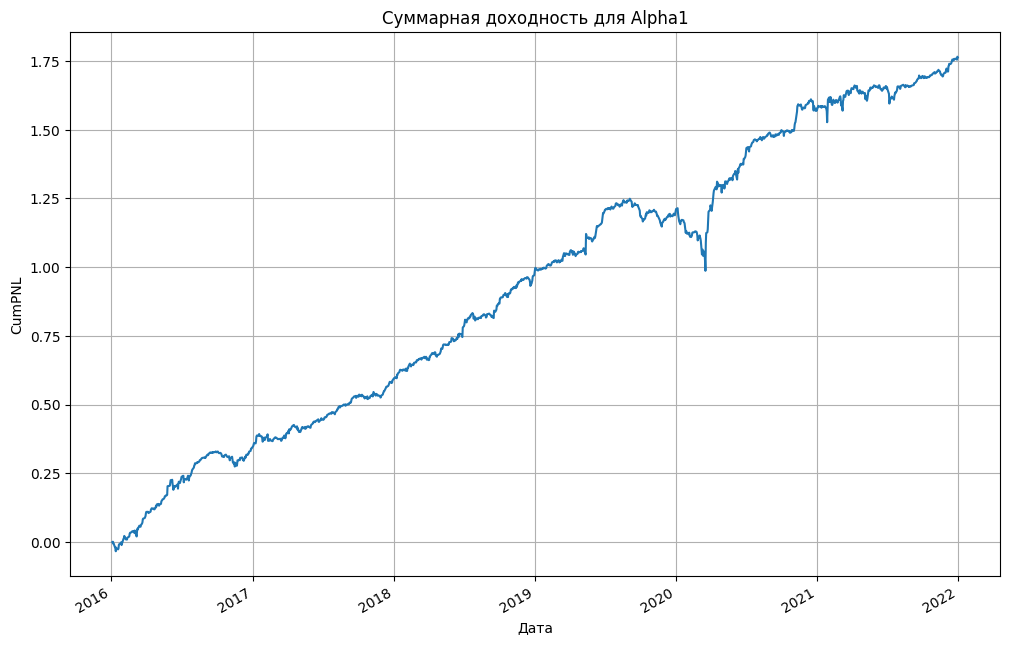

In [15]:
run_alpha(Alpha1)

***
$$ \alpha_{2} = \frac{high}{close} $$

In [16]:
class Alpha2(BaseAlpha):
    def get_weights(self, dh):
        raw = dh.data['high'].div(dh.data['close'])
        self.w = decay(raw, 5)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.3583282243786899
average_Sharpe = 1.9137552668844993
sum_pnl = 1.529549983577878
****************************************
Максимальная просадка за 2016 год: 0.060861902303312676
Коэффициент Шарпа за 2016 год: 3.010738416806148
Средний оборот за 2016 год: 0.3507896347333421
Суммарная доходность за 2016 год: 0.3262768387459857
------------------------------
Максимальная просадка за 2017 год: 0.04751999017222441
Коэффициент Шарпа за 2017 год: 2.3458330065945527
Средний оборот за 2017 год: 0.3500393692467464
Суммарная доходность за 2017 год: 0.19056331171786278
------------------------------
Максимальная просадка за 2018 год: 0.07659100326866686
Коэффициент Шарпа за 2018 год: 1.2163263935172006
Средний оборот за 2018 год: 0.367322450591967
Суммарная доходность за 2018 год: 0.1387424251077658
------------------------------
Максимальная просадка за 2019 год: 0.10025769501658977
Коэффициент Шарпа за 2019 год: 0.8557617171391075
Сре

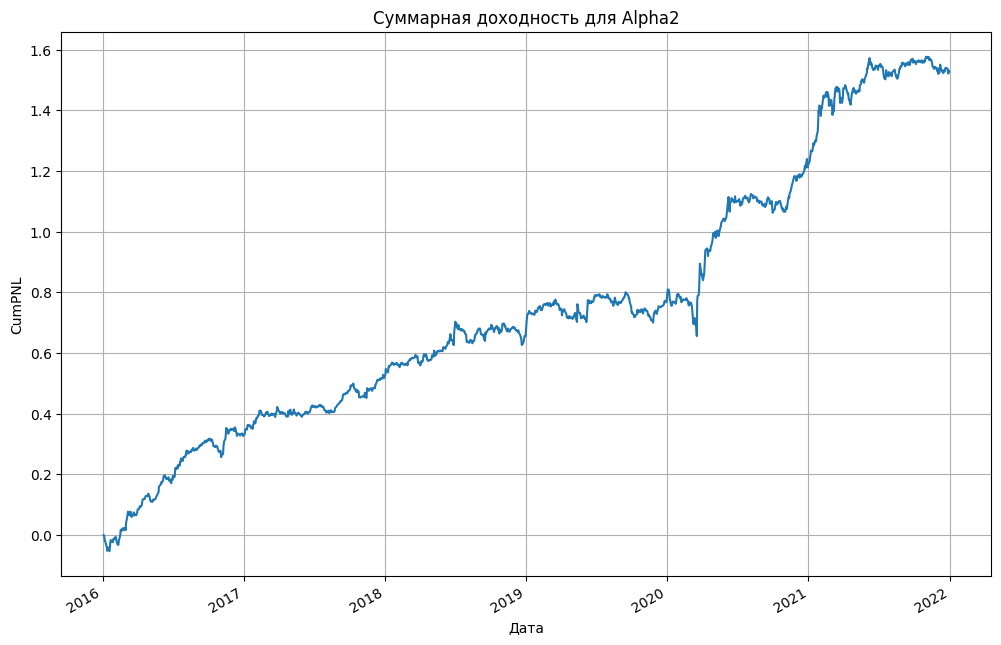

In [17]:
run_alpha(Alpha2)

***
$$ \alpha_{3} = close(d-4)/close(d-1) $$

In [18]:
class Alpha3(BaseAlpha):
    def get_weights(self, dh):
        raw = dh.data['close'].shift(8).div(dh.data['close'].shift(1))
        self.w = decay(raw, 5)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.30207850632883
average_Sharpe = 1.2279740959782757
sum_pnl = 0.8824086033565649
****************************************
Максимальная просадка за 2016 год: 0.02666835784778354
Коэффициент Шарпа за 2016 год: 2.4723685426003126
Средний оборот за 2016 год: 0.2897240916051306
Суммарная доходность за 2016 год: 0.25591828472429545
------------------------------
Максимальная просадка за 2017 год: 0.03276998089751776
Коэффициент Шарпа за 2017 год: 1.7261564547883226
Средний оборот за 2017 год: 0.30529723749586263
Суммарная доходность за 2017 год: 0.09552649574503935
------------------------------
Максимальная просадка за 2018 год: 0.1004046301798297
Коэффициент Шарпа за 2018 год: 0.3572650580893427
Средний оборот за 2018 год: 0.30352828258047043
Суммарная доходность за 2018 год: 0.06832202914197986
------------------------------
Максимальная просадка за 2019 год: 0.08669068722723983
Коэффициент Шарпа за 2019 год: 1.1980303628791895


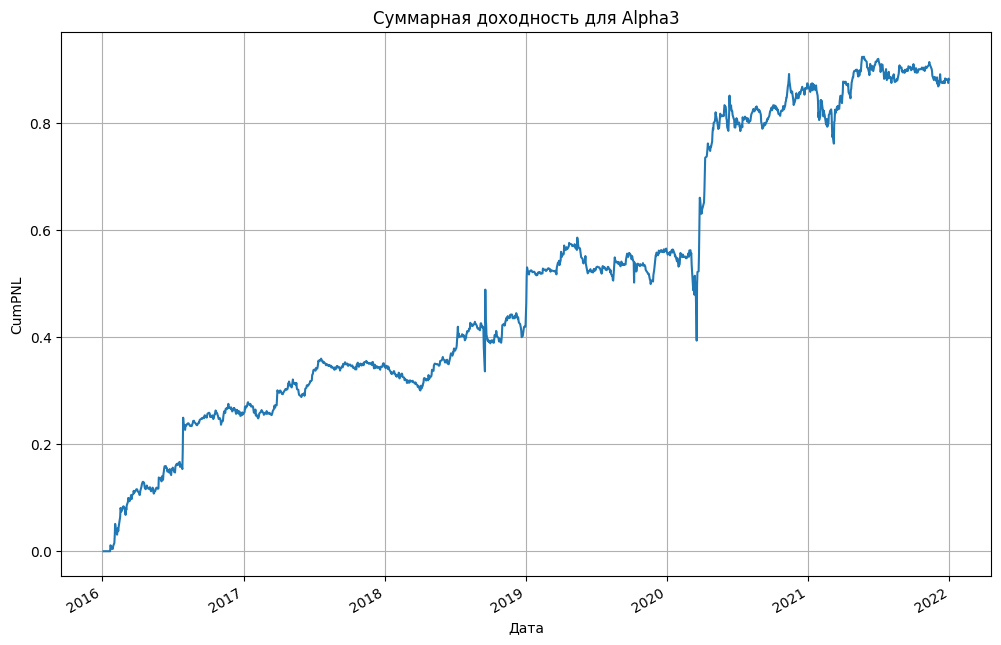

In [19]:
run_alpha(Alpha3)

***
$$\alpha_{4} = - \frac{(low - close) * open^5}{(low - high) * close^5} $$

In [20]:
class Alpha4(BaseAlpha):
    def get_weights(self, dh):
        raw = (-1 * ((dh.data['low'] - dh.data['close']) * (dh.data['open'].pow(5)))) / ((dh.data['low'] - dh.data['high']) * (dh.data['close'].pow(5)))
        self.w = decay(raw, 5)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.6996369282542378
average_Sharpe = 6.467391155962866
sum_pnl = 1.498447109820367
****************************************
Максимальная просадка за 2016 год: 0.01092560501268837
Коэффициент Шарпа за 2016 год: 7.185275840349907
Средний оборот за 2016 год: 0.6805336173673532
Суммарная доходность за 2016 год: 0.2385067042454589
------------------------------
Максимальная просадка за 2017 год: 0.007408763019578657
Коэффициент Шарпа за 2017 год: 8.08348406737889
Средний оборот за 2017 год: 0.6971048257517027
Суммарная доходность за 2017 год: 0.20921495296827014
------------------------------
Максимальная просадка за 2018 год: 0.004800659419609832
Коэффициент Шарпа за 2018 год: 8.398178756739542
Средний оборот за 2018 год: 0.7072536318790755
Суммарная доходность за 2018 год: 0.2522912970050222
------------------------------
Максимальная просадка за 2019 год: 0.008520140603264115
Коэффициент Шарпа за 2019 год: 6.205437026404071
Средн

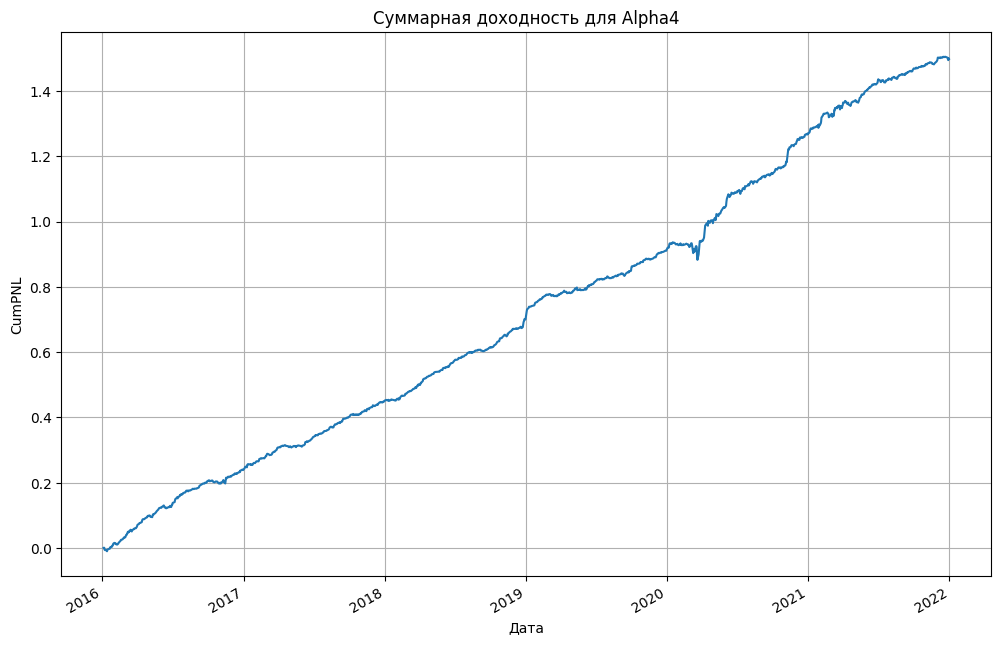

In [21]:
run_alpha(Alpha4)

***
$$ \alpha_{5} = ts\_rank(\frac{volume}{ts\_mean(volume, 5)}, 50)$$

In [22]:
class Alpha5(BaseAlpha):
    def get_weights(self, dh):
        self.w = dh.data['volume'] / ts_mean(dh.data['volume'], 5)
        self.w = ts_rank(self.w, 50)
        self.w = decay(self.w, 4)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.7590946072722358
average_Sharpe = 2.733111037596812
sum_pnl = 0.4939593320695779
****************************************
Максимальная просадка за 2016 год: 0.019998521573615043
Коэффициент Шарпа за 2016 год: 0.8779218931666642
Средний оборот за 2016 год: 0.6125151978724137
Суммарная доходность за 2016 год: 0.018724012023924066
------------------------------
Максимальная просадка за 2017 год: 0.007649983269640892
Коэффициент Шарпа за 2017 год: 2.8751904670895834
Средний оборот за 2017 год: 0.7889921640053864
Суммарная доходность за 2017 год: 0.05140249172096979
------------------------------
Максимальная просадка за 2018 год: 0.007857664670812059
Коэффициент Шарпа за 2018 год: 2.7173760550539896
Средний оборот за 2018 год: 0.7883942069789005
Суммарная доходность за 2018 год: 0.05814840042865521
------------------------------
Максимальная просадка за 2019 год: 0.00887411596218532
Коэффициент Шарпа за 2019 год: 4.9033764108458

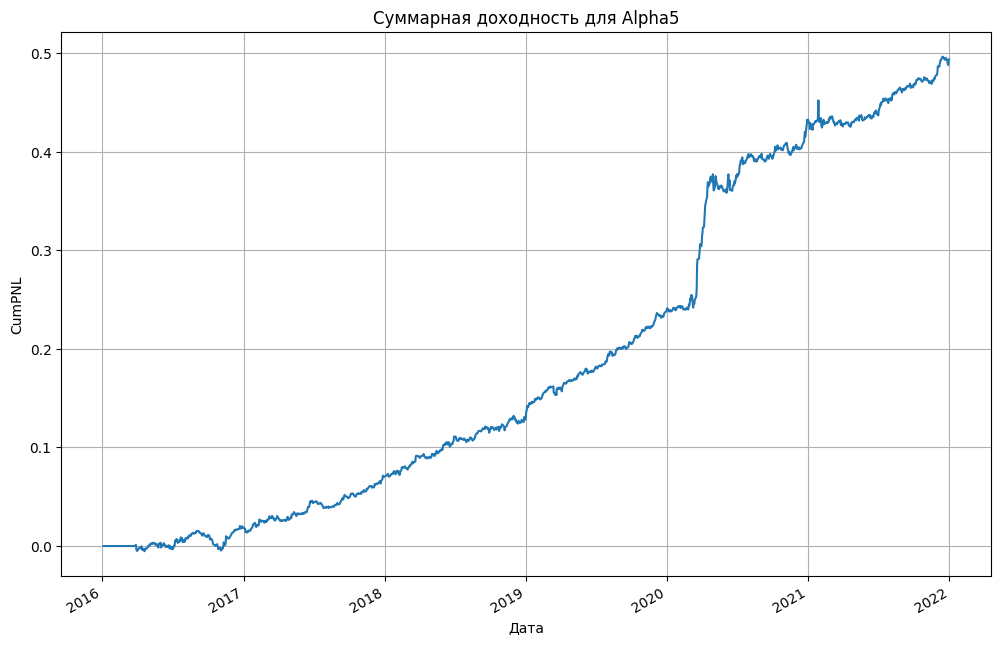

In [23]:
run_alpha(Alpha5)

***
$$\alpha_{6} = \frac{ts\_rank(open, 50)}{ts\_rank(close, 50)}$$

In [24]:
class Alpha6(BaseAlpha):
    def get_weights(self, dh):
        self.w = ts_rank(dh.data['open'], 50) / ts_rank(dh.data['close'], 50)
        self.w = decay(self.w, 4)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.6452875778289555
average_Sharpe = 3.2630351167426253
sum_pnl = 0.9868678750300417
****************************************
Максимальная просадка за 2016 год: 0.02509085084664392
Коэффициент Шарпа за 2016 год: 3.9351473699544526
Средний оборот за 2016 год: 0.5334916742037776
Суммарная доходность за 2016 год: 0.2045172153841427
------------------------------
Максимальная просадка за 2017 год: 0.02189039117764846
Коэффициент Шарпа за 2017 год: 3.6700992114109985
Средний оборот за 2017 год: 0.6421362690875233
Суммарная доходность за 2017 год: 0.13784672294967545
------------------------------
Максимальная просадка за 2018 год: 0.011471889272220759
Коэффициент Шарпа за 2018 год: 5.827244125415237
Средний оборот за 2018 год: 0.6509382558440072
Суммарная доходность за 2018 год: 0.1874222487512984
------------------------------
Максимальная просадка за 2019 год: 0.03404063792383505
Коэффициент Шарпа за 2019 год: 2.9022367246544865
С

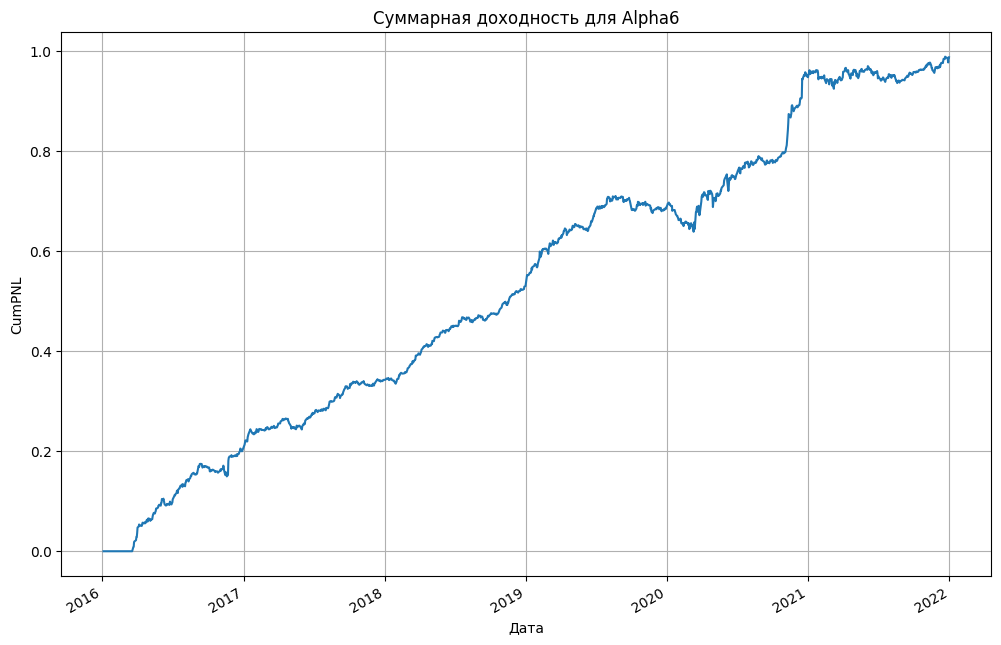

In [25]:
run_alpha(Alpha6)

***
$$\alpha_{7} = \frac{ts\_rank(high, 5)}{ts\_rank(close, 5)}$$

In [26]:
class Alpha7(BaseAlpha):
    def get_weights(self, dh):
        self.w = ts_rank(dh.data['high'], 5) / ts_rank(dh.data['close'], 5)
        self.w = decay(self.w, 6)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.6323211708758731
average_Sharpe = 3.42699254127816
sum_pnl = 0.5866778844084618
****************************************
Максимальная просадка за 2016 год: 0.012496537298811075
Коэффициент Шарпа за 2016 год: 4.865823483751873
Средний оборот за 2016 год: 0.6100390320586209
Суммарная доходность за 2016 год: 0.1344500597162237
------------------------------
Максимальная просадка за 2017 год: 0.007757824673333746
Коэффициент Шарпа за 2017 год: 4.263591338520714
Средний оборот за 2017 год: 0.6385385528048795
Суммарная доходность за 2017 год: 0.08438878200682566
------------------------------
Максимальная просадка за 2018 год: 0.0057126793181320745
Коэффициент Шарпа за 2018 год: 5.294703840183249
Средний оборот за 2018 год: 0.6386611238107761
Суммарная доходность за 2018 год: 0.11540907071908729
------------------------------
Максимальная просадка за 2019 год: 0.017597317295601766
Коэффициент Шарпа за 2019 год: 3.3098244441429276


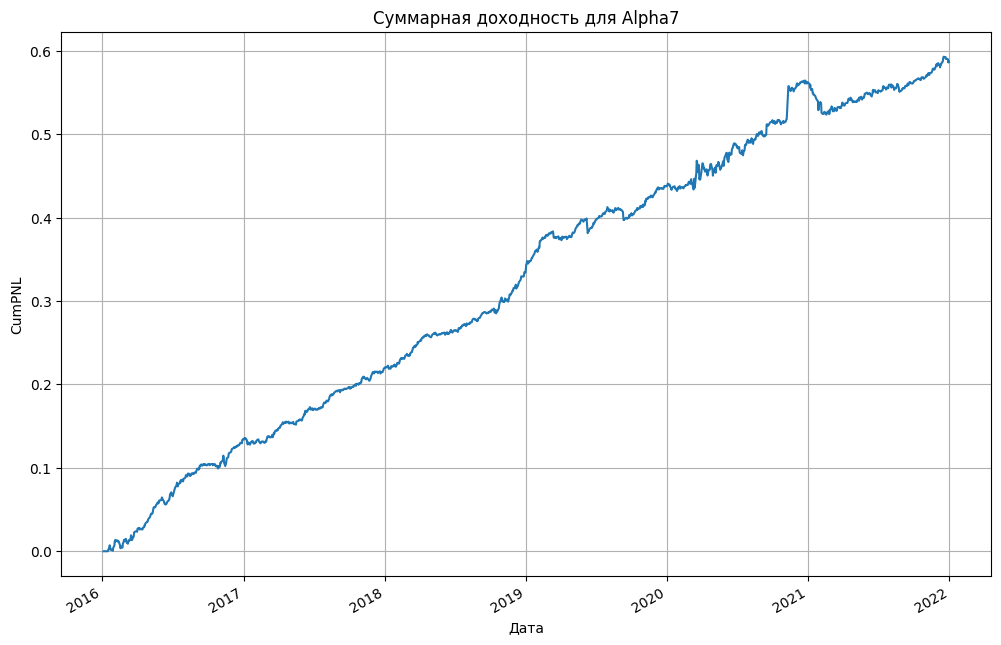

In [27]:
run_alpha(Alpha7)

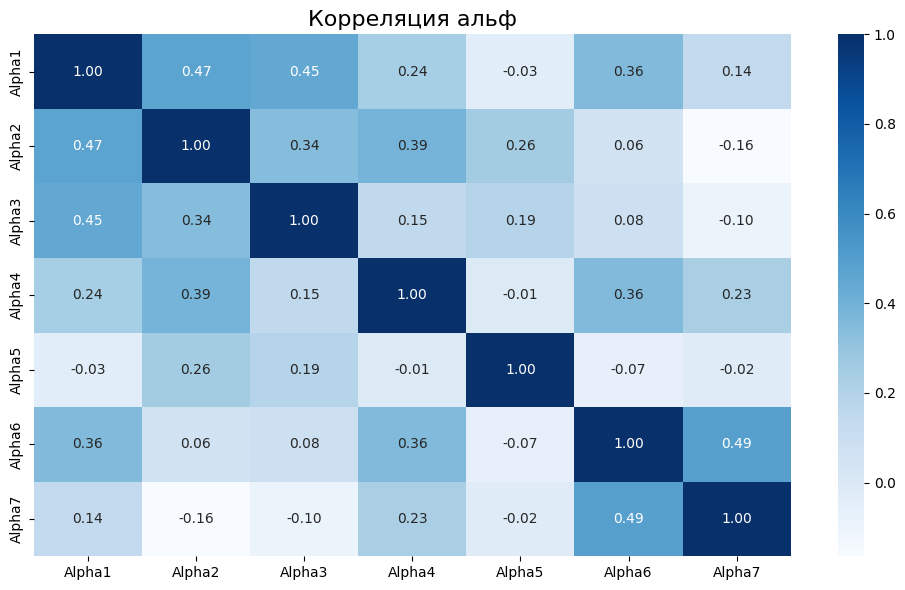

In [28]:
compare_alphas(rtrns)

***
$$ \alpha_{8} = 1 - \frac{close}{ts\_mean(close, 120)}$$

In [29]:
class Alpha8(BaseAlpha):
    def get_weights(self, dh):
        self.w = 1 - dh.data['close'] / ts_mean(dh.data['close'], 120)
        # self.w = decay(self.w, 2)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.1383624388014581
average_Sharpe = 1.496557502248523
sum_pnl = 0.8643905172017703
****************************************
Максимальная просадка за 2016 год: 0.01631691491919689
Коэффициент Шарпа за 2016 год: 1.3780122417380056
Средний оборот за 2016 год: 0.07684678009108317
Суммарная доходность за 2016 год: 0.061207646025001824
------------------------------
Максимальная просадка за 2017 год: 0.03833024401996213
Коэффициент Шарпа за 2017 год: 1.651099243233283
Средний оборот за 2017 год: 0.1431149474399749
Суммарная доходность за 2017 год: 0.09944190931044072
------------------------------
Максимальная просадка за 2018 год: 0.053058051121534666
Коэффициент Шарпа за 2018 год: 1.3185435343154939
Средний оборот за 2018 год: 0.1482744441268642
Суммарная доходность за 2018 год: 0.08608030319706728
------------------------------
Максимальная просадка за 2019 год: 0.050293696130116694
Коэффициент Шарпа за 2019 год: 2.93272020563438

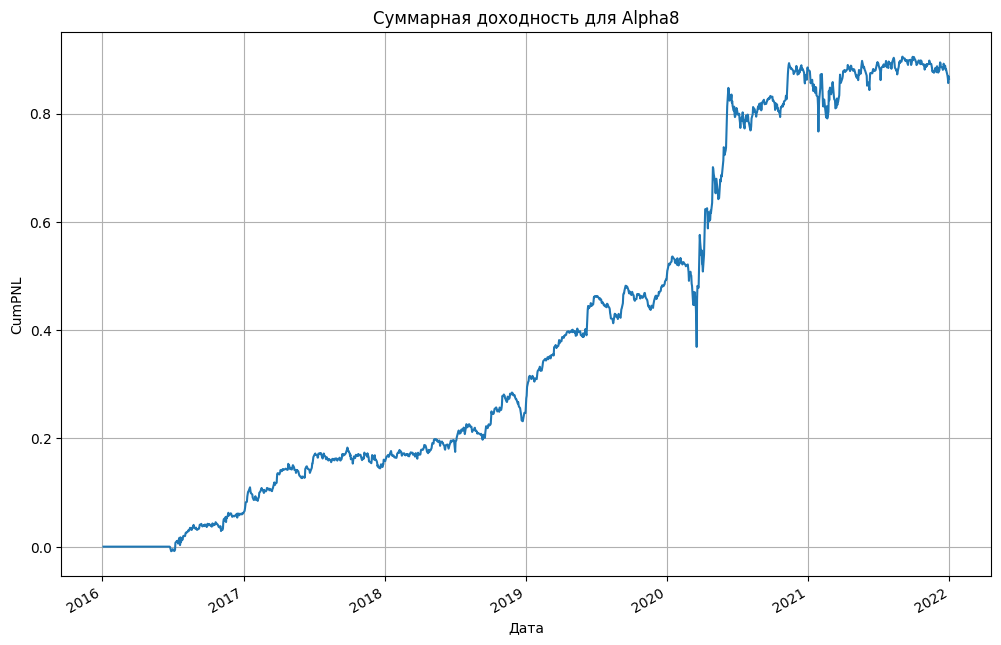

In [30]:
run_alpha(Alpha8)

In [31]:
def stddev(df: pd.DataFrame, win: int) -> pd.DataFrame:
    """
        Returns time-series rolling correlation between two dataframes for the past win rows
    """
    return df.rolling(win).std()

def ts_correlation(df1: pd.DataFrame, df2: pd.DataFrame, win: int) -> pd.DataFrame:
    """
        Returns time-series rolling correlation between two dataframes for the past win rows
    """
    return df1.rolling(win).corr(df2)

class Alpha9(BaseAlpha):
    def get_weights(self, dh):
        self.w = - stddev(dh.data['high'], 10).rank() * ts_correlation(dh.data['high'], dh.data['volume'], 15)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.32466824206722544
average_Sharpe = 1.9654346056109933
sum_pnl = 0.4462748232208106
****************************************
Максимальная просадка за 2016 год: 0.029298624360112234
Коэффициент Шарпа за 2016 год: 2.4722038938019897
Средний оборот за 2016 год: 0.3083143084654989
Суммарная доходность за 2016 год: 0.08382523414357052
------------------------------
Максимальная просадка за 2017 год: 0.015048678297096968
Коэффициент Шарпа за 2017 год: 1.9830470969159315
Средний оборот за 2017 год: 0.33502092775558834
Суммарная доходность за 2017 год: 0.06601637837137556
------------------------------
Максимальная просадка за 2018 год: 0.01948655674745417
Коэффициент Шарпа за 2018 год: 2.92282068596199
Средний оборот за 2018 год: 0.32398673122340166
Суммарная доходность за 2018 год: 0.0856309954501596
------------------------------
Максимальная просадка за 2019 год: 0.02010107441393949
Коэффициент Шарпа за 2019 год: 2.42811798534792

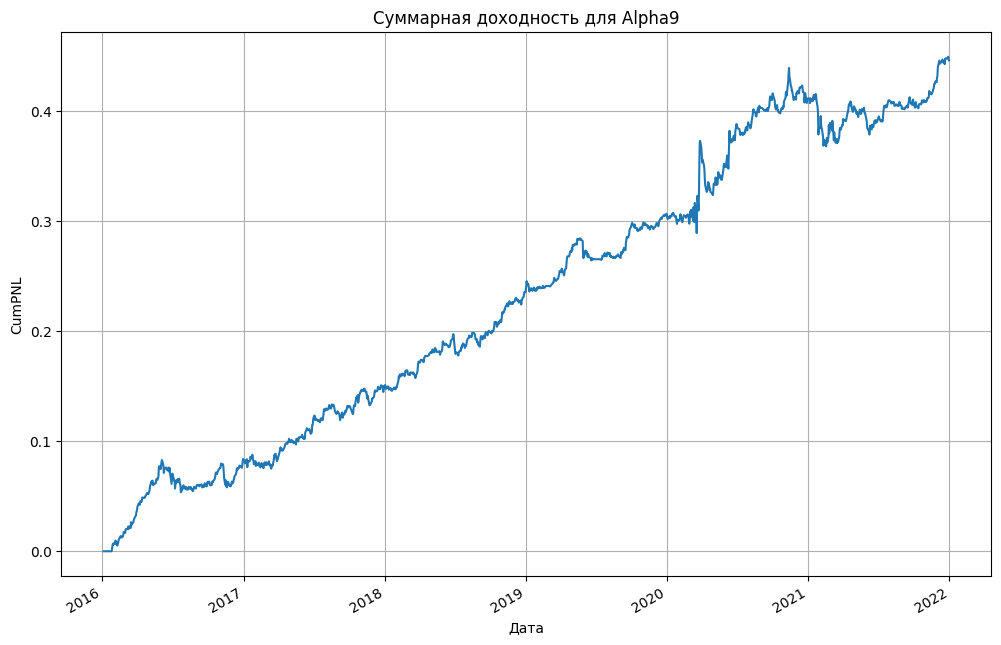

In [32]:
run_alpha(Alpha9)

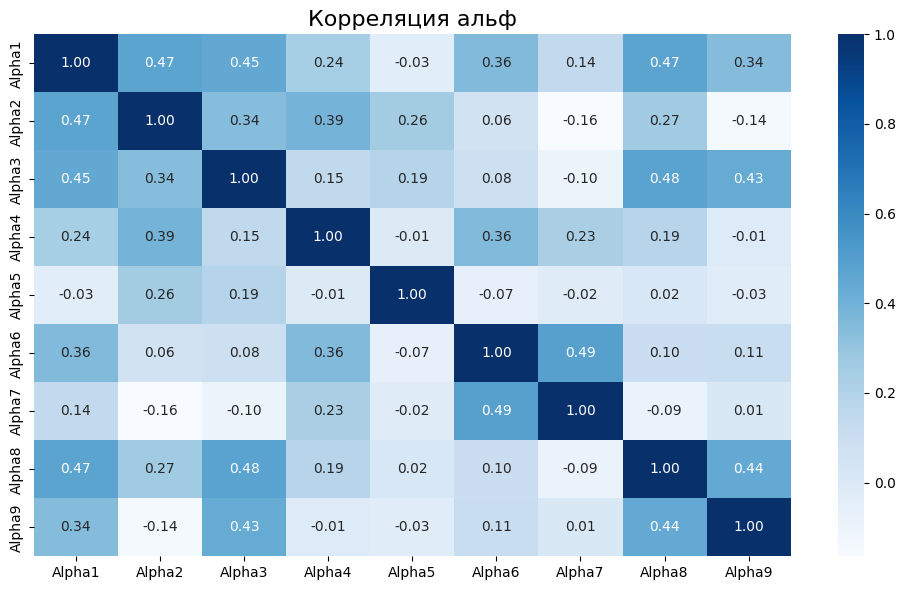

In [33]:
compare_alphas(rtrns)

In [ ]:
stats_df = pd.DataFrame.from_dict(stats, orient="index")
stats_df = stats_df.reset_index()
stats_df.columns = ['Стратегии', 'AVG(turnover)', 'AVG(sharpe)', 'SUM(pnl)']

print(stats_df)

  Стратегии  AVG(turnover)  AVG(sharpe)  SUM(pnl)
0    Alpha1       0.727460     2.770121  1.762658
1    Alpha2       0.358328     1.913755  1.529550
2    Alpha3       0.302079     1.227974  0.882409
3    Alpha4       0.699637     6.467391  1.498447
4    Alpha5       0.759095     2.733111  0.493959
5    Alpha6       0.645288     3.263035  0.986868
6    Alpha7       0.632321     3.426993  0.586678
7    Alpha8       0.138362     1.496558  0.864391
8    Alpha9       0.324668     1.965435  0.446275


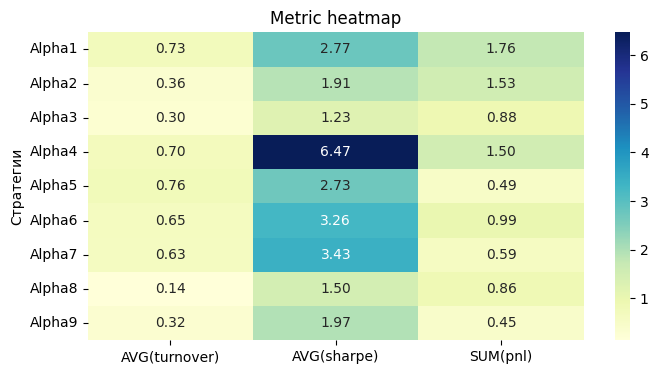

In [39]:
plot_data = stats_df.set_index('Стратегии')

plt.figure(figsize=(8, 4))
sns.heatmap(plot_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Metric heatmap")
plt.show()

In [35]:
# def get_decay_param(alpha : pd.DataFrame, returns : pd.DataFrame, n_max : int = 10) -> int:
#     _pnl : pd.Series = calculate_holding_pnl(alpha, returns)
#     _turnover : pd.Series = calculate_turnover(alpha)
#     best_score = (_pnl / _turnover).mean()
#     print(f"n = 1, temp_score = {best_score}, cumpnl = {_pnl.sum()}, turnover = {_turnover.mean()}")
    
#     best_n = 1
#     params = np.arange(2, n_max + 1)
#     for n in params:
#         decayed_alpha = decay(alpha, n)
#         _pnl = calculate_holding_pnl(decayed_alpha, returns)dh.data['volume'], 10
#         _turnover = calculate_turnover(decayed_alpha)
#         temp_score = (_pnl / _turnover).mean()
#         print(f"n = {n}, temp_score = {temp_score}, cumpnl = {_pnl.sum()}, turnover = {_turnover.mean()}")
#         if temp_score > best_score:
#             best_score = temp_score
#             best_n = n

#     return best_n

In [36]:
# returns = calculate_returns(close)

# double_close = close * close
# test_alpha = (high * low).div(double_close)

# n = get_decay_param(alpha=test_alpha, returns=returns, n_max = 30)